In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/home/bhavye/Desktop/data/analysis/datasets/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.dropna(axis=0,inplace=True) #No missing values in dataset NOW.
df.drop('show_id',axis=1,inplace=True)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


Movie      5185
TV Show     147
Name: type, dtype: int64


<AxesSubplot: xlabel='type', ylabel='count'>

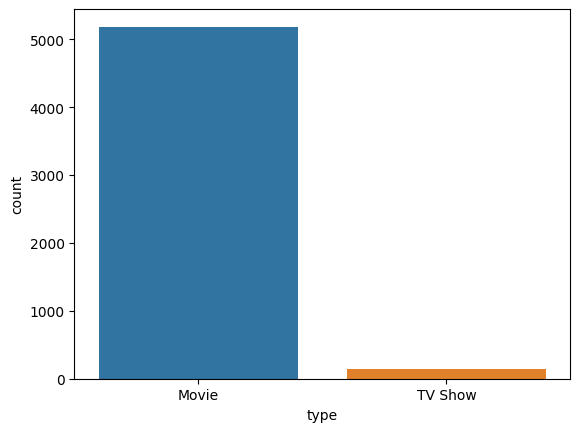

In [6]:
## TYPE COLUMN
df['type'].nunique() # -> 2
print(df['type'].value_counts())
sns.countplot(x=df['type'])

In [7]:
df['director'].value_counts()

Raúl Campos, Jan Suter           18
Marcus Raboy                     15
Jay Karas                        14
Cathy Garcia-Molina              13
Martin Scorsese                  12
                                 ..
Igor Kovalyov, Norton Virgien     1
Danny Cannon                      1
Mana Yasuda                       1
Gupse Özay                        1
Mozez Singh                       1
Name: director, Length: 3945, dtype: int64

2017    657
2018    648
2016    577
2019    519
2020    442
Name: release_year, dtype: int64


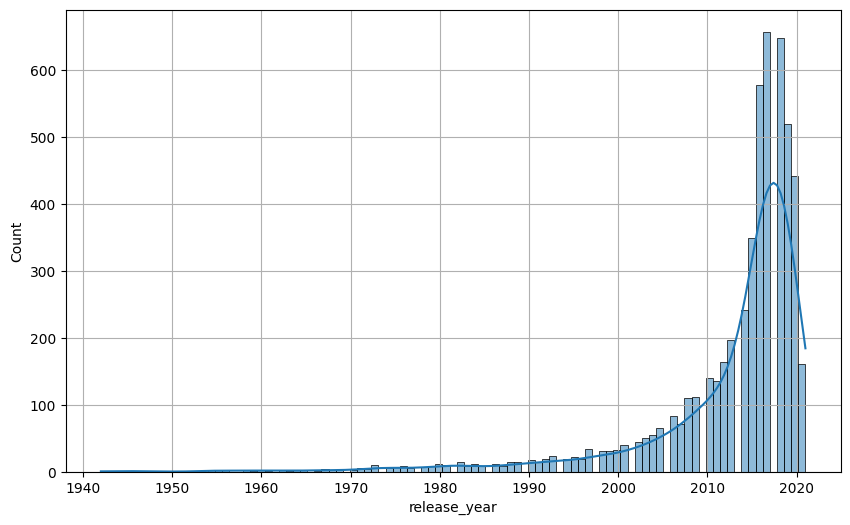

In [8]:
# df['release_year'].hist()
print(df['release_year'].value_counts().head())
plt.figure(figsize=(10,6))
sns.histplot(data=df,x=df['release_year'],kde=True)
plt.grid()

94.0    135
93.0    130
97.0    129
95.0    127
90.0    123
Name: duration_movies, dtype: int64
Minimum time duration for movies : 8.0
Minimum time duration for movies : 253.0


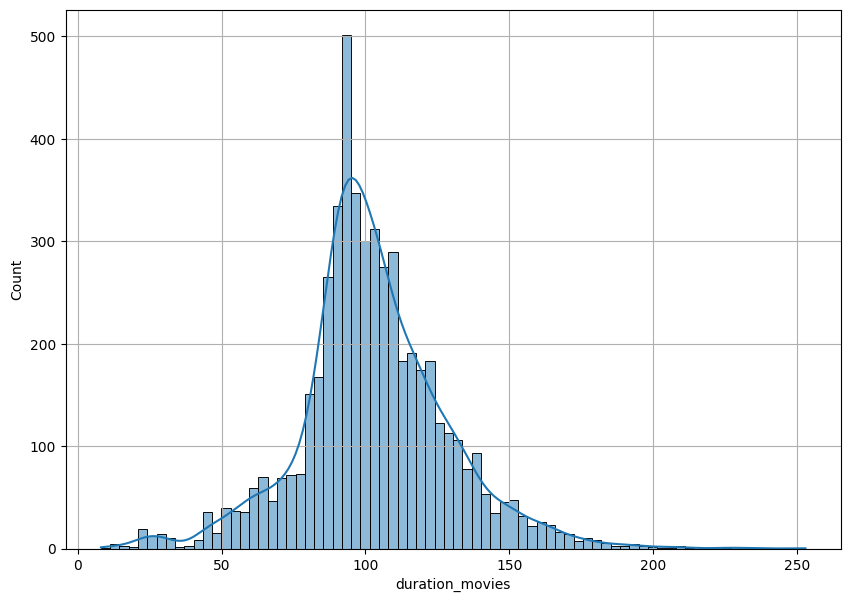

In [36]:
movies = df.copy()

movies['duration_movies'] = movies[movies['type']=='Movie']['duration'].apply(lambda x: int(x.split(" ")[0]))
print(movies['duration_movies'].value_counts().head())
movies.sort_values(by="duration_movies",ascending=False)
plt.figure(figsize=(10,7))
movies.drop('duration',axis=1,inplace=True)
sns.histplot(data=movies,x=movies['duration_movies'],kde=True)
print(f"Minimum time duration for movies : {movies['duration_movies'].min()}")
print(f"Minimum time duration for movies : {movies['duration_movies'].max()}")
# df['duration_movies'].plot()
plt.grid()

In [10]:
tv_shows = df.copy()
tv_shows = tv_shows[tv_shows['type']=='TV Show']
tv_shows['seasons'] = tv_shows['duration'].apply(lambda x : int(x.split(" ")[0]))
tv_shows.drop('duration',axis=1,inplace=True)
tv_shows.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,seasons
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9
198,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",Alhaja Eniola Salami starts anew and sets her ...,1
273,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i...",1
276,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, Spa...",A writer in creative and marital crises finds ...,2
297,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,TV Shows,"From amusement to awe, the nine human emotions...",1


1    106
2     18
5      6
4      4
9      3
Name: seasons, dtype: int64
Maximum seasons : 15


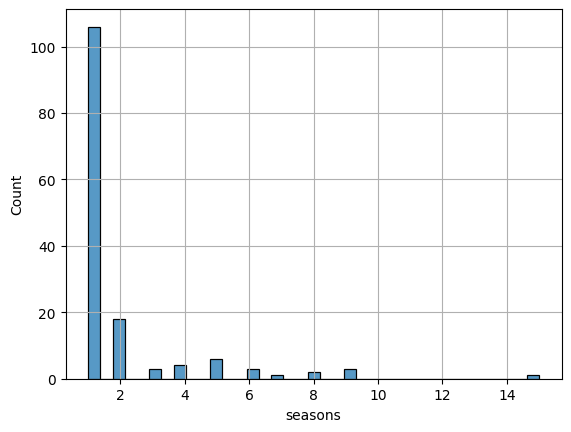

In [11]:
print(tv_shows['seasons'].value_counts().head())
sns.histplot(data=tv_shows,x=tv_shows['seasons'])
print(f"Maximum seasons : {tv_shows['seasons'].max()}")
plt.grid()

In [12]:
tv_shows['country'].value_counts().head()
# plt.figure(figsize=(30,6))
# sns.histplot(data=tv_shows,x='country')
countries = tv_shows['country'].value_counts()
print(countries.head(7))
# sns.histplot(data=tv_shows,x=tv_shows['country'])
# countries.index

United States     27
United Kingdom    19
Japan             10
South Korea       10
Spain              7
India              7
Taiwan             7
Name: country, dtype: int64


2020    33
2019    24
2017    17
2018    16
2021    15
Name: release_year, dtype: int64
[2021 2011 2019 2018 2014 2006 2020 2015 2017 2016 2012 2010 2013 1990
 2001]

Most old tv_show year : 1990


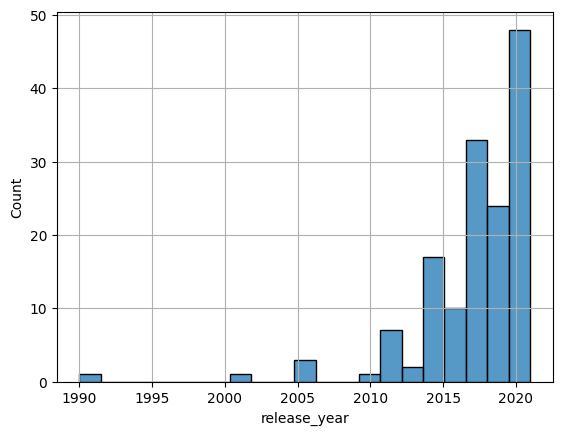

In [13]:
print(tv_shows['release_year'].value_counts().head())
print(tv_shows['release_year'].unique(),end = "\n\n")
print(f"Most old tv_show year : {tv_shows['release_year'].min()}")
sns.histplot(data=tv_shows,x=tv_shows['release_year']) # FOR TV SHOWS
plt.grid()

In [14]:
print(tv_shows['director'].value_counts().head())
# sns.histplot(data=tv_shows,x=tv_shows['director'])
print(tv_shows['director'].nunique())

Alastair Fothergill    3
Stan Lathan            2
Iginio Straffi         2
Rob Seidenglanz        2
Shin Won-ho            2
Name: director, dtype: int64
141


TV-MA    81
TV-14    37
TV-PG    15
TV-Y7     6
TV-Y      5
TV-G      3
Name: rating, dtype: int64


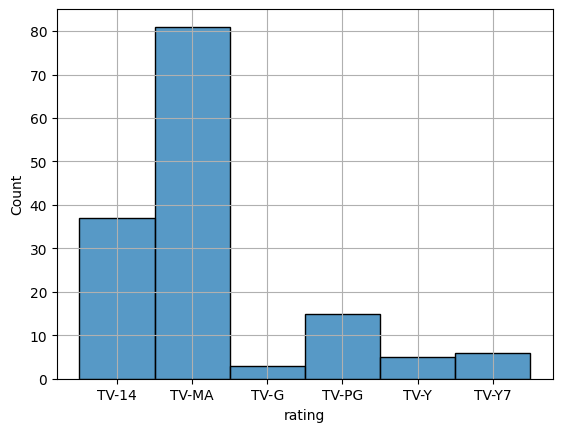

In [15]:
print(tv_shows['rating'].value_counts())
sns.histplot(data=tv_shows,x=tv_shows['rating'])
plt.grid()

In [16]:
# tv_shows.groupby(by='rating').head(1)
tv_shows.drop('description',axis=1,inplace=True)
tv_shows.head()

,type,title,director,cast,country,date_added,release_year,rating,listed_in,seasons
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV",9
198,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",1
273,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",1
276,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, Spa...",2
297,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,TV Shows,1


In [30]:
tv_shows.sort_values(by=['release_year','seasons'],ascending=True)
tv_shows.groupby(by=['director','release_year']).head(5)

,type,title,director,cast,country,date_added,release_year,rating,listed_in,seasons
8,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,"British TV Shows, Reality TV",9
198,TV Show,King of Boys: The Return of the King,Kemi Adetiba,"Sola Sobowale, Toni Tones, Richard Mofe-Damijo...",Nigeria,"August 27, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",1
273,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",1
276,TV Show,Valeria,Inma Torrente,"Diana Gómez, Silma López, Paula Malia, Teresa ...",Spain,"August 13, 2021",2021,TV-MA,"International TV Shows, Romantic TV Shows, Spa...",2
297,TV Show,Navarasa,"Bejoy Nambiar, Priyadarshan, Karthik Narain, V...","Suriya, Vijay Sethupathi, Revathy, Prakash Raj...",India,"August 6, 2021",2021,TV-MA,TV Shows,1
...,...,...,...,...,...,...,...,...,...,...
8172,TV Show,Th Eena Meena Deeka Chase Comedy Show,Dheeraj Berry,"Sanjay Keni, Priya Raina",India,"March 31, 2018",2015,TV-Y7,"Kids' TV, TV Comedies",1
8214,TV Show,The Blue Planet: A Natural History of the Oceans,Alastair Fothergill,David Attenborough,United Kingdom,"October 10, 2015",2001,TV-G,"British TV Shows, Docuseries, International TV...",1
8293,TV Show,The Fear,Michael Samuels,"Peter Mullan, Anastasia Hille, Harry Lloyd, Pa...",United Kingdom,"March 31, 2017",2012,TV-MA,"British TV Shows, Crime TV Shows, TV Dramas",1
8302,TV Show,The Five,Mark Tonderai,"Tom Cullen, O.T. Fagbenle, Lee Ingleby, Sarah ...",United Kingdom,"September 15, 2017",2016,TV-MA,"British TV Shows, Crime TV Shows, TV Dramas",1
